<center><h1>Diving into Data Modeling and Validation</h1></center>

## Table of contents

* [Supervised Learning Process](#supervised)
* [Supervised Learning Algorithms](#supervised_algos)
    * [Linear Regression](#linear)
* [Case Study 1: Regression](#case1)

<a id='intro_ml'></a>
## Introduction to Machine Learning

**The very basic process:**

**Step 01:** Segregate the target and features columns. Split your data into **training** and **test** sets.



* **Training Dataset** is the sample of data used to fit the model.
* **Test Dataset** is the sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.

The question is what is a good train-test split ratio? There is no unversal rule, some good ratios are 80:20, 70:30.

**Step 02:** Select the appropriate machine learning algorithms according to the nature of your data.

**Step 03:** Select the metrics that are important to you according to the problem.

**Step 04:** Train the algorithm using the **training set**. After training, you'll get your trained model. **Model = Algorithm + Training Data**.

**Step 05:** Make preditions on the **test data** and evaluate your model's performance.

<h4 style="color:red;">Note</h4> This is not the best supervised learning process. This is very basic process. There are better learning process which we'll learn in the future classes.


<a id='supervised_algos'></a>
## Supervised Learning Algorithms

<a id='linear'></a>
### Linear Regression

Linear regression performs the task to predict a dependent variable value **(y)** based on a given independent variable **(x)**. So, this regression technique finds out a linear relationship between **x (input)** and **y (output)**. Hence, the name is Linear Regression.

The mathematical formula of the linear regression can be written as follow:

## $y = \beta_0 + \beta_1x + \varepsilon$

We read this as $y$ is modeled as $beta_1$ (b1) times $x$, plus a constant $beta_0$ (b0), plus an error term $\varepsilon$.”

Here:
* $\beta_0$ is the intercept,
* $\beta_1$ is the regression weights or coefficients associated with the predictors $x$
* $\varepsilon$ is the error term (also known as the residual errors)

The figure below illustrates a simple linear regression model, where:


![alter text](linear-regression.png)

From the scatter plot above, it can be seen that not all the data points fall exactly on the fitted regression line. Some of the points are above the blue line and some are below it; overall, the residual errors ($e$) have approximately mean zero.

The sum of the squares of the residual errors are called the **Residual Sum of Squares or RSS**.
Mathematically, the beta coefficients ($\beta_0$ and $\beta_1$) are determined so that the RSS is as minimal as possible. This method of determining the beta coefficients can be **ordinary least squares (OLS)** or **gradient descent.**


**Linear Regression has 2 of the following types:**
1. Simple Linear Regression
2. Multiple Linear Regression

When you have a single predictor or independent variable, it is **simple linear regression**. The above equation we saw was the equation of simple linear regression.

In **multiple linear regression** you have multiple predictor variables. 
The equation will be:

## $y = \beta_0+\beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \varepsilon$

Here:
* $\beta_0$ is the intercept,
* $\beta_1, \beta_2, \beta_n$ are the regression weights or coefficients associated with the predictors $x_1, x_2, x_n$

In [1]:
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [2]:
#import sckit learn

from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [3]:
import numpy as np
import pandas as pd

data = pd.read_csv("Salary_Data.csv") 

data.head()

,experience,cgpa,salary
0,1.1,2.62,39343
1,1.3,3.08,46205
2,1.5,2.50,37731
3,2.0,2.90,43525
4,2.2,2.65,39891


In [4]:
# Row and column in the dataset
data.shape

(30, 3)

<Axes: xlabel='experience', ylabel='salary'>

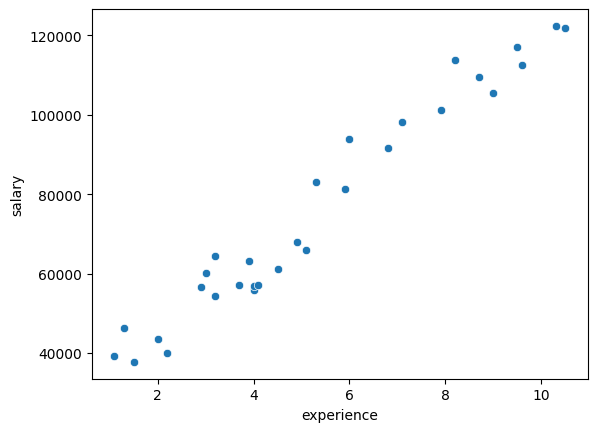

In [5]:
# plot the dataset
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.scatterplot(data=data,x='experience',y='salary')

**Step 01:** Segregate the target and features columns. Split your data into **training** and **test** sets.


In [6]:
from sklearn.model_selection import train_test_split
X=data.loc[:,data.columns=='experience']
y=data.loc[:,data.columns=='salary']

In [7]:
X

,experience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("""X_train:{}
y_train:{}
X_test: {}
y_test: {} """.format(X_train.shape,y_train.shape,X_test.shape,y_test.shape))


X_train:(24, 1)
y_train:(24, 1)
X_test: (6, 1)
y_test: (6, 1) 


**Step 02:** Select the appropriate machine learning algorithms according to the nature of your data.

We'll use **Simple Linear Regression**.

**Step 03:** Select the metrics that are important to you according to the problem.

We'll use the **$R^2$** score as our evaluation metric. We'll try to maximize it.

**Step 04:** Train the algorithm using the **training set**. 

In [9]:
LR.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
#find the coefficient
LR.coef_

array([[9423.81532303]])

In [11]:
#find the intercept
LR.intercept_

array([25321.58301178])

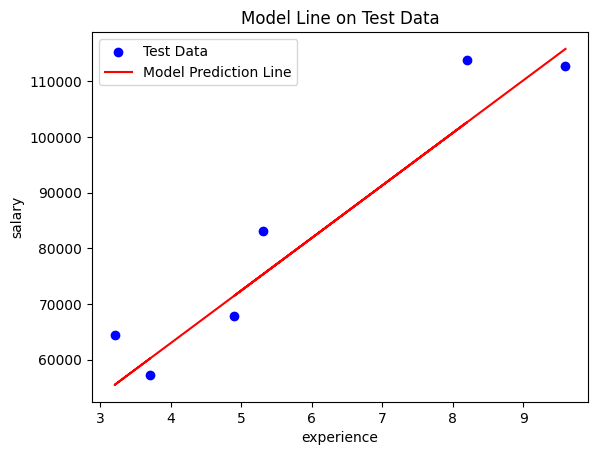

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the test data points
plt.scatter(X_test, y_test, color='blue', label='Test Data')

# Plot the regression line using the model predictions on X_test
y_pred_line = LR.predict(X_test)
plt.plot(X_test, y_pred_line, color='red', label='Model Prediction Line')

plt.xlabel('experience')
plt.ylabel('salary')
plt.title('Model Line on Test Data')
plt.legend()
plt.show()


<Axes: xlabel='experience', ylabel='salary'>

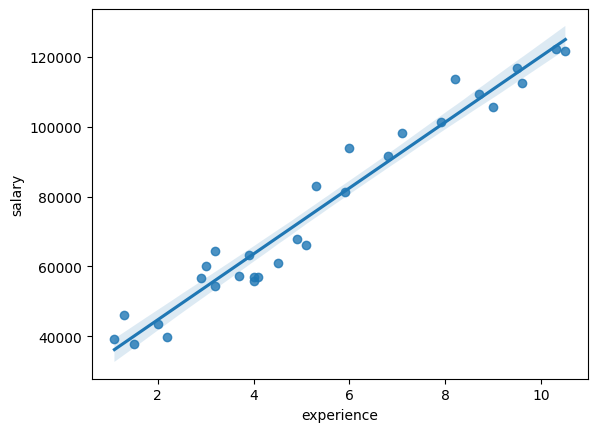

In [14]:
sns.regplot(x="experience", y="salary", data=data)

**Step 05:** Make preditions on the **test data** and evaluate your model's performance.

In [19]:
y_pred=LR.predict(X_test)
y_pred

array([[115790.21011287],
       [ 71498.27809463],
       [102596.86866063],
       [ 75267.80422384],
       [ 55477.79204548],
       [ 60189.69970699]])

In [21]:
pd.DataFrame({'True':y_test.values.ravel(),'predict':y_pred.ravel()})

,True,predict
0,112635,115790.210113
1,67938,71498.278095
2,113812,102596.868661
3,83088,75267.804224
4,64445,55477.792045
5,57189,60189.699707


In [23]:
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

r2 = r2_score(y_test, y_pred)
print("The R^2 score is {}".format(r2))

print("mean absolute error",mean_absolute_error(y_test, y_pred))

The R^2 score is 0.9024461774180497
mean absolute error 6286.453830757749


* R² = 0.902 → The model explains about 90.2% of the variance in the test target. That’s a strong amount of explained variance for a simple model.
* MAE ≈ 6,286 → On average the model's predictions are off by about 6.3k (in the units of salary). Whether this is “good” depends on the salary scale — e.g., 6.3k is small if average salary ≈ 100k (6.3%), but large if average salary ≈ 30k (21%).